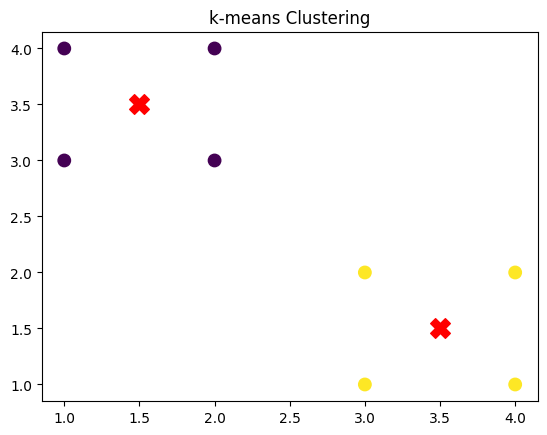

Centers:
[[1.5 3.5]
 [3.5 1.5]]
Assignments:
(3, 1)→2
(3, 2)→2
(4, 1)→2
(4, 2)→2
(1, 3)→1
(1, 4)→1
(2, 3)→1
(2, 4)→1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = np.array([[3,1],[3,2],[4,1],[4,2],[1,3],[1,4],[2,3],[2,4]])
init_centers = np.array([[0,4], [3,3]])

# 训练模型并预测
model = KMeans(n_clusters=2, init=init_centers, n_init=1).fit(data)
clusters = model.cluster_centers_
labels = model.labels_

# 可视化
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis', s=80)
plt.scatter(clusters[:,0], clusters[:,1], c='red', s=200, marker='X')
plt.title("k-means Clustering")
plt.show()

# 简洁输出
print(f"Centers:\n{clusters}\nAssignments:")
for p, l in zip(data, labels):
    print(f"{tuple(p)}→{l+1}")

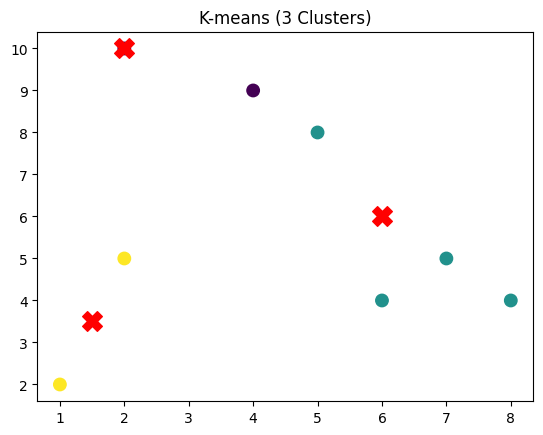


Max iterations: 1
Centers:
 [[ 2.  10. ]
 [ 6.   6. ]
 [ 1.5  3.5]]
Assignments: (2, 10)→1 (2, 5)→3 (8, 4)→2 (5, 8)→2 (7, 5)→2 (6, 4)→2 (1, 2)→3 (4, 9)→1


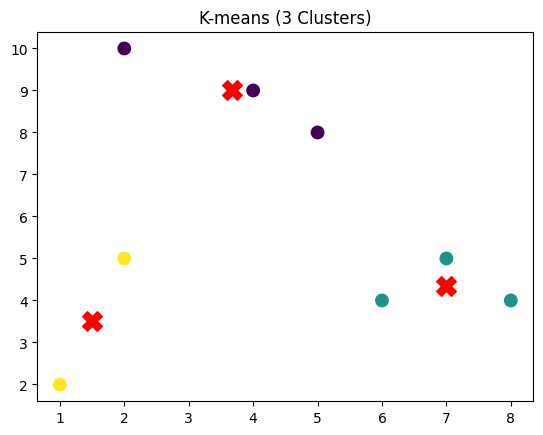


Max iterations: 300
Centers:
 [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]
Assignments: (2, 10)→1 (2, 5)→3 (8, 4)→2 (5, 8)→1 (7, 5)→2 (6, 4)→2 (1, 2)→3 (4, 9)→1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_kmeans(data, init_centers, n_clusters, max_iter):
    # 训练模型
    model = KMeans(n_clusters=n_clusters, init=init_centers, 
                  n_init=1, max_iter=max_iter, random_state=42).fit(data)
    
    # 可视化
    plt.scatter(data[:, 0], data[:, 1], c=model.labels_, cmap='viridis', s=80)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
               c='red', s=200, marker='X')
    plt.title(f"K-means ({n_clusters} Clusters)")
    plt.show()
    
    # 输出结果
    print(f"\nMax iterations: {max_iter}")
    print("Centers:\n", model.cluster_centers_)
    print("Assignments:", *[f"{tuple(p)}→{l+1}" for p, l in zip(data, model.labels_)])

# 数据集和初始中心
data = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
init_centers = np.array([[2,10], [5,8], [1,2]])

# 执行聚类分析
plot_kmeans(data, init_centers, 3, 1)
plot_kmeans(data, init_centers, 3, 300)

Core:
 [[1 1]
 [4 1]
 [1 2]] 
Noise:
 [] 
Labels: 0 1 0 0 0 1 1 1 0 0 1 0


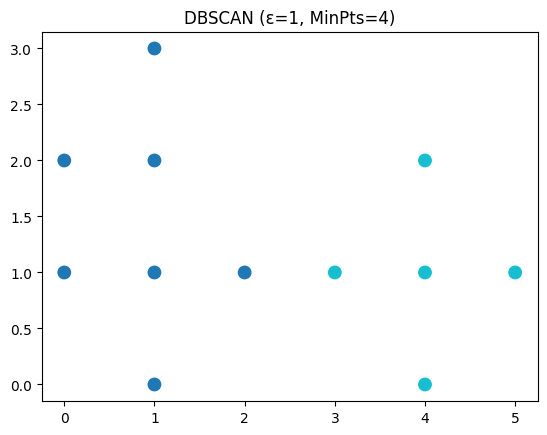

In [4]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[1,0],[4,0],[0,1],[1,1],[2,1],[3,1],[4,1],[5,1],[0,2],[1,2],
                 [4,2],[1,3]])

# 执行聚类（合并为单行代码）
model = DBSCAN(eps=1, min_samples=4).fit(data)
labels = model.labels_

# 可视化（精简样式参数）
plt.scatter(data[:,0], data[:,1], c=labels, cmap='tab10', s=80)
plt.title("DBSCAN (ε=1, MinPts=4)")

# 紧凑结果展示
print("Core:\n", data[model.core_sample_indices_],
      "\nNoise:\n", data[labels == -1],
      "\nLabels:", *labels)  # 使用 * 展开标签

K= 1 → -


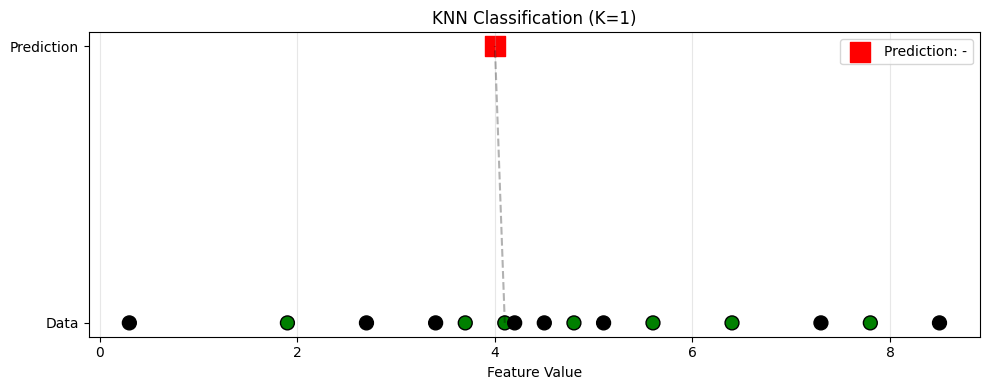

K= 3 → -


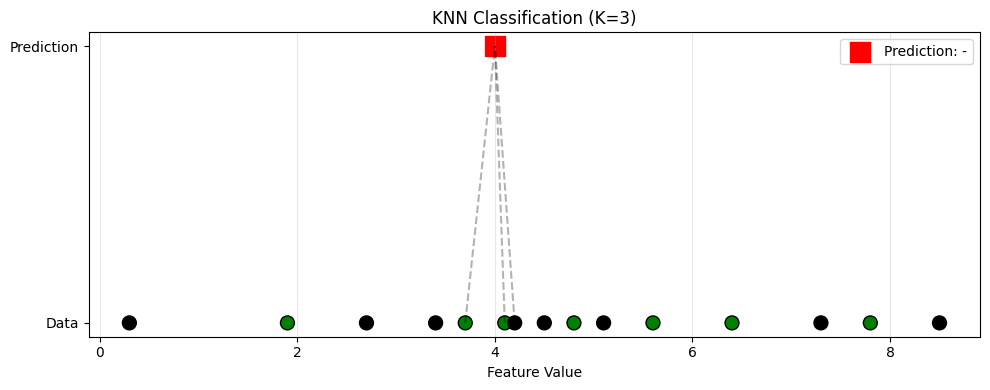

K= 5 → +


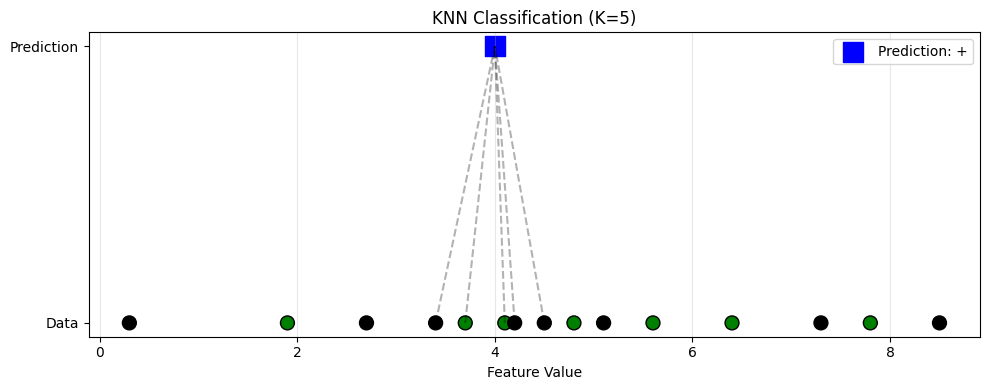

K= 7 → +


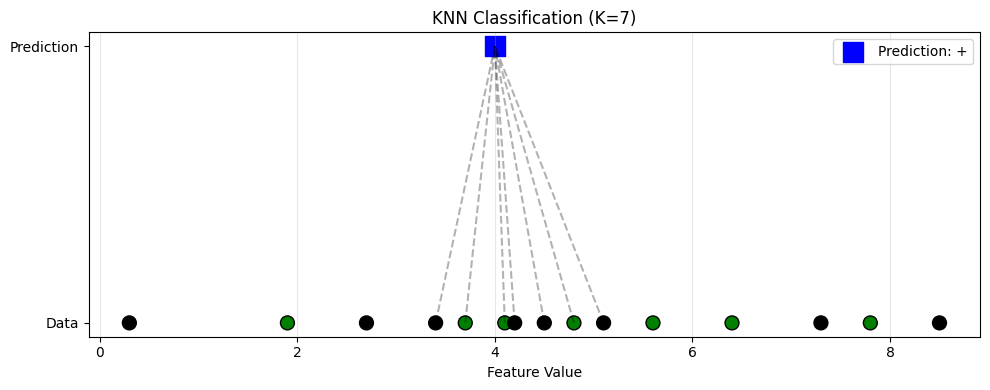

K= 9 → +


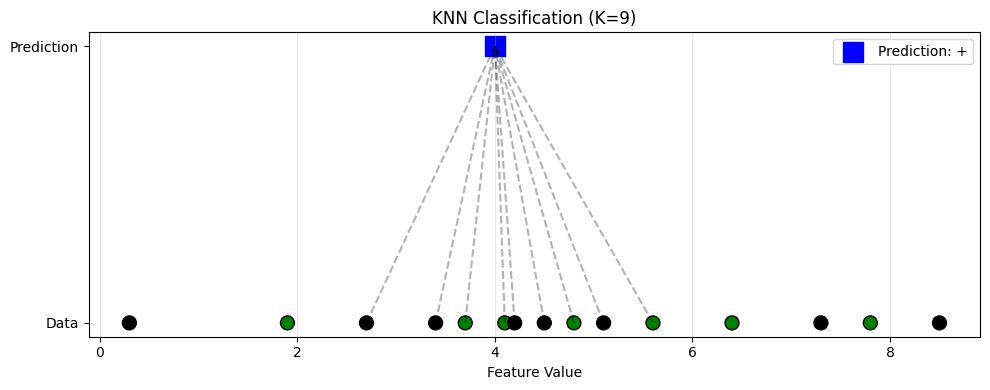

K=11 → -


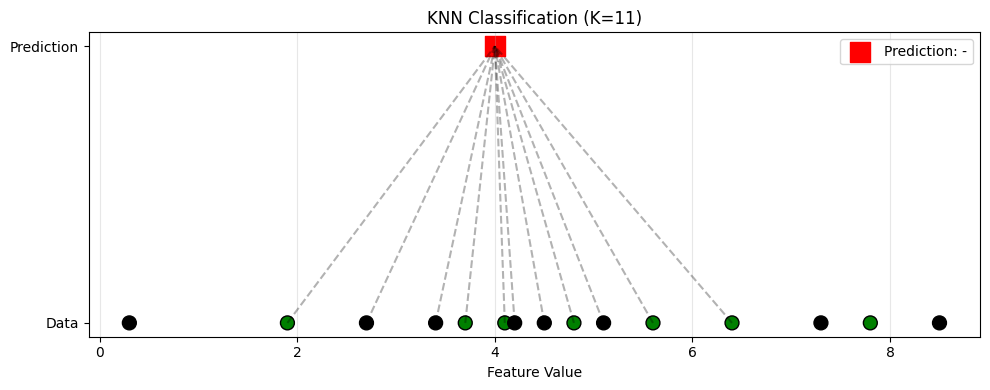

In [7]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X = np.array([0.3,1.9,2.7,3.4,3.7,4.1,4.2,4.5,4.8,5.1,5.6,6.4,7.3,7.8,8.5])[:,None]
y = np.array(['+','-','+','+','-','-','+','+','-','+','-','-','+','-','+'])
color = ['black' if l=='+' else 'green' for l in y]  # 预生成颜色列表

for K in [1,3,5,7,9,11]:
    plt.figure(figsize=(10,4))
    
    # 一次性绘制所有数据点
    plt.scatter(X[:,0], [0]*len(X), c=color, s=100, edgecolor='k') 
    
    # 训练模型并预测
    pred = KNeighborsClassifier(n_neighbors=K).fit(X,y).predict([[4]])[0]
    print(f"K={K:2} → {pred}")
    
    # 绘制预测点
    plt.scatter(4, 0.5, c='blue' if pred=='+' else 'red', marker='s', s=200, 
               label=f'Prediction: {pred}')
    
    # 绘制连接线
    _, idx = KNeighborsClassifier(n_neighbors=K).fit(X,y).kneighbors([[4]])
    [plt.plot([X[i][0],4], [0,0.5], 'k--', alpha=0.3) for i in idx[0]]
    
    # 统一设置图形参数
    plt.title(f'KNN Classification (K={K})')
    plt.yticks([0,0.5], ['Data','Prediction'])
    plt.xlabel('Feature Value')
    plt.legend()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()